# Get Pareto front function

Use is_pareto_efficient to get the Pareto front of a set of solutions.

Use keep_efficient if Pareto "weakly" dominated set of solutions prefered. 

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Faster than is_pareto_efficient_simple, but less readable.
def is_pareto_efficient(costs, minimize, return_mask = True):
    """
    Pareto optimal solutions
    -------
    from: https://stackoverflow.com/questions/32791911/fast-calculation-of-pareto-front-in-python
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :param return_mask: True to return a mask
    :return: An array of indices of pareto-efficient points.
        If return_mask is True, this will be an (n_points, ) boolean array
        Otherwise it will be a (n_efficient_points, ) integer array of indices.
    """
    if not minimize: costs=costs*-1#as originally made for max
    
    is_efficient = np.arange(costs.shape[0])
    n_points = costs.shape[0]
    next_point_index = 0  # Next index in the is_efficient array to search for
    while next_point_index<len(costs):
        nondominated_point_mask = np.any(costs<costs[next_point_index], axis=1)
        nondominated_point_mask[next_point_index] = True
        is_efficient = is_efficient[nondominated_point_mask]  # Remove dominated points
        costs = costs[nondominated_point_mask]
        next_point_index = np.sum(nondominated_point_mask[:next_point_index])+1
    if return_mask:
        is_efficient_mask = np.zeros(n_points, dtype = bool)
        is_efficient_mask[is_efficient] = True
        return is_efficient_mask
    else:
        return is_efficient

    
def keep_efficient(pts,minimize=True):
    '''
    Pareto front (of --weakly-- non-dominated set) of solutions
    
    -----
    more efficient than is_pareto_efficient algorithm, but return also weak dominated solutions
    from https://stackoverflow.com/questions/32791911/fast-calculation-of-pareto-front-in-python
    '''
    if minimize: pts=pts*-1#as originally made for max
        
    # sort points by decreasing sum of coordinates
    pts = pts[pts.sum(1).argsort()[::-1]]
    # initialize a boolean mask for undominated points
    # to avoid creating copies each iteration
    undominated = np.ones(pts.shape[0], dtype=bool)
    for i in range(pts.shape[0]):
        # process each point in turn
        n = pts.shape[0]
        if i >= n:
            break
        # find all points not dominated by i
        # since points are sorted by coordinate sum
        # i cannot dominate any points in 1,...,i-1
        undominated[i+1:n] = (pts[i+1:] >= pts[i]).any(1) 
        # keep points undominated so far
        pts = pts[undominated[:n]]
    
    if minimize: pts=pts*-1#as originally made for max
    return pts


def _print(vals,fmt="b.",label=""):
    points = vals
    # Extract x and y coordinates from the points
    x= [point[0] for point in points]
    y= [point[1] for point in points]
    plt.plot(x,y,fmt, label=label)
    plt.grid(True)
    plt.legend()

In [15]:
### Data for test
def example():
    df = []
    SS = np.arange(0, 4.0001, 1)
    for s1 in SS:
        for s2 in SS:
            x = 2*(s1 + s2 + 0.1 * s1 * s2);  p1, p2 = x - s1**2, x - s2**2; df.append([-p1, -p2])
    vals = np.array(df)     
    return vals

def example2():
    return np.array([[1, 2], [3, 4], [2, 5], [4, 3], [5, 2]])

def example3():
    return np.array([[0.3296170319979843, 0.0, 0.44472108843537406], [0.3296170319979843,0.0, 0.44472108843537406], [0.32920760896951373, 0.0, 0.4440408163265306], [0.32920760896951373, 0.0, 0.4440408163265306], [0.33815192743764166, 0.0, 0.44356462585034007]])

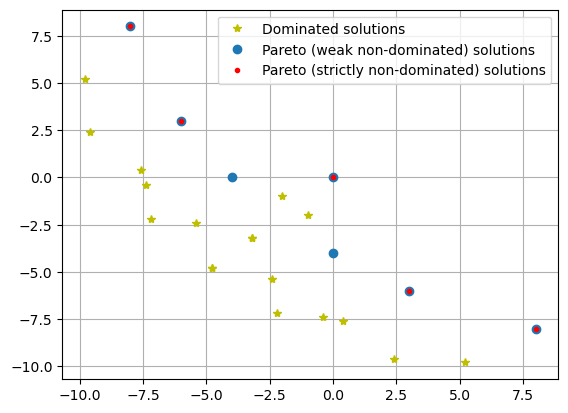

In [19]:
### Test set up
vals = example()  # data
minimise = False  # problem type (maximise/minimise)

### Run test
# keep_efficient algorithm
pf1 = keep_efficient(vals,minimise)

# is_pareto_efficient algorithm
pf2 = vals[is_pareto_efficient(vals,minimise)]

### Print
_print(vals,fmt="y*",label='Dominated solutions')
_print(pf1, fmt="o",label='Pareto (weak non-dominated) solutions')
_print(pf2, fmt="r.",label='Pareto (strictly non-dominated) solutions')

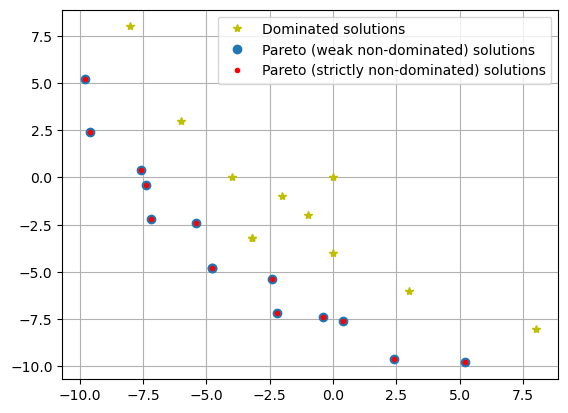

In [18]:
### Test set up
vals = example()  # data
minimise = True  # problem type

### Run test
# keep_efficient algorithm
pf1 = keep_efficient(vals,minimise)

# is_pareto_efficient algorithm
pf2 = vals[is_pareto_efficient(vals,minimise)]

### Print
_print(vals,fmt="y*",label='Dominated solutions')
_print(pf1, fmt="o",label='Pareto (weak non-dominated) solutions')
_print(pf2, fmt="r.",label='Pareto (strictly non-dominated) solutions')